<a href="https://colab.research.google.com/github/Wondupper/Clustering_Points/blob/main/%D0%A2%D0%BE%D1%87%D0%BA%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Сгенерируйте несколько датасетов, состоящих из точек на плоскости по аналогии https://scikit-learn.org/stable/auto_examples/cluster/plot_linkage_comparison.html#sphx-glr-auto-examples-cluster-plot-linkage-comparison-py  или вручную:

(+) 1) в виде двух параллельных отрезков,

(+) 2) в виде "восьмёрки" (две касающиеся окружности),

(+) 3) в виде отрезка, пересекающего два круга (или "пятна"),

(+) 4) свой вариант.

Количество точек не менее 500.

Для каждого набора точек выбрать пару алгоритмов кластеризации с хорошо интерпретируемыми, но различными результатами и алгоритм с "плохим" разбиением, объяснить результаты.

#Параллельные отрезки

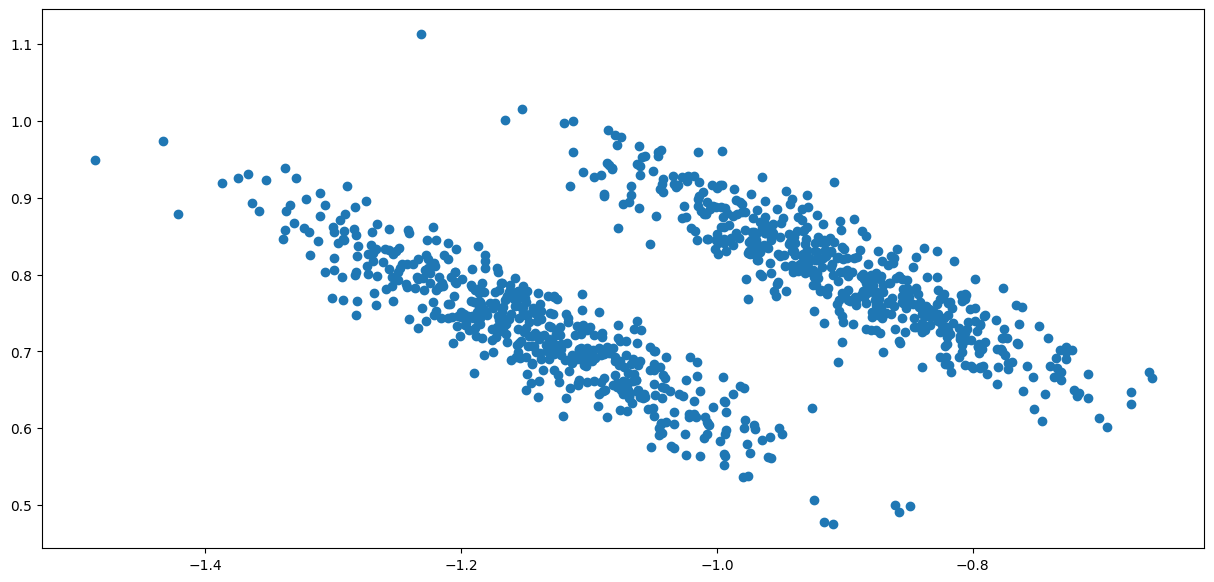

In [ ]:
from sklearn import datasets
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

lines, Y = datasets.make_blobs(n_samples = 1000, centers = [[0, 1], [-0.8, 1]], cluster_std=0.1, random_state = 42)
lines = np.dot(lines, [[0.3, 0.1], [-0.9, 0.8]])

plt.figure(figsize = (15, 7))
plt.scatter(lines[:,0], lines[:,1])

#Две пересекающиеся окружности

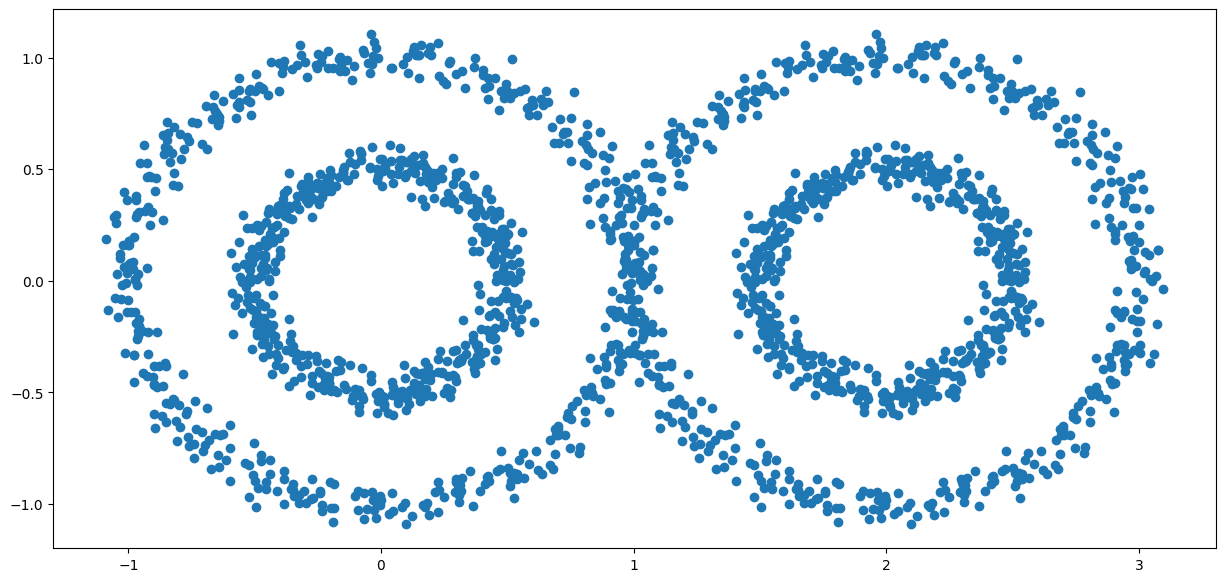

In [ ]:
circles, Y = datasets.make_circles(n_samples = 1000, factor=0.5, noise=0.05)
circles = np.vstack([circles, [[2 + i, j] for i, j in circles]])

plt.figure(figsize = (15,7))
plt.scatter(circles[:,0], circles[:,1])

#Отрезок, пересекающий два круга

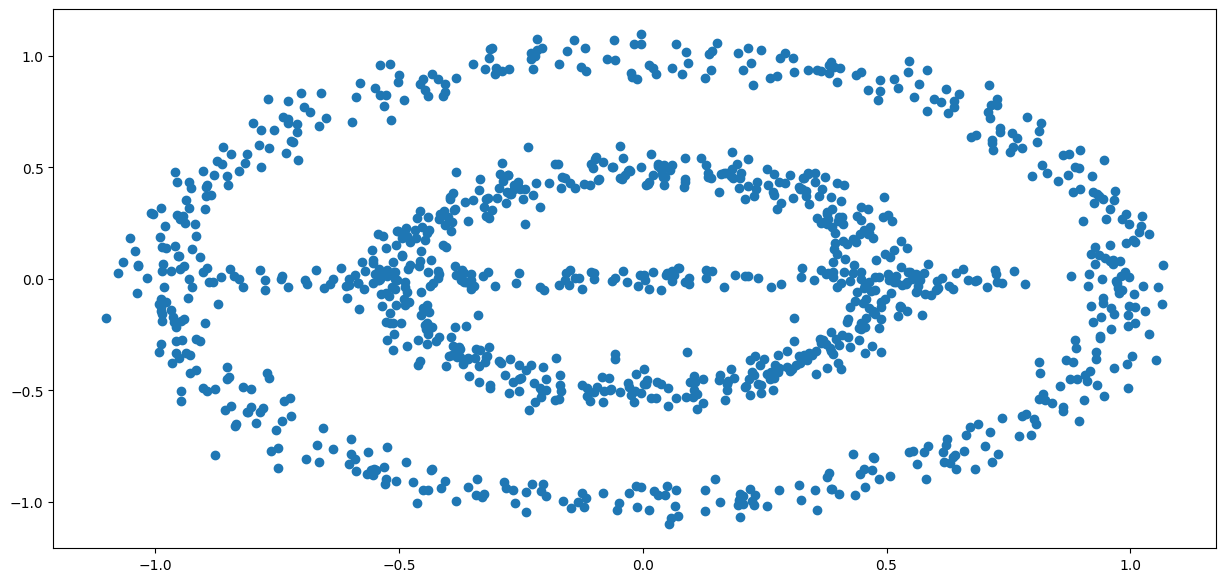

In [ ]:
import random
line_points = []
for i in range(150):
  line_points.append([random.random() * ((-1) ** random.randint(0, 1)),
                   random.random() * 0.05 * ((-1) ** random.randint(0, 1))])

lines1 = np.array(line_points)

circles23, _ = datasets.make_circles(n_samples=1000, factor=0.5, noise=0.05)
donut = np.vstack([circles23, lines1])
plt.figure(figsize = (15,7))
plt.scatter(donut[:,0], donut[:,1])

#Собственная реализация

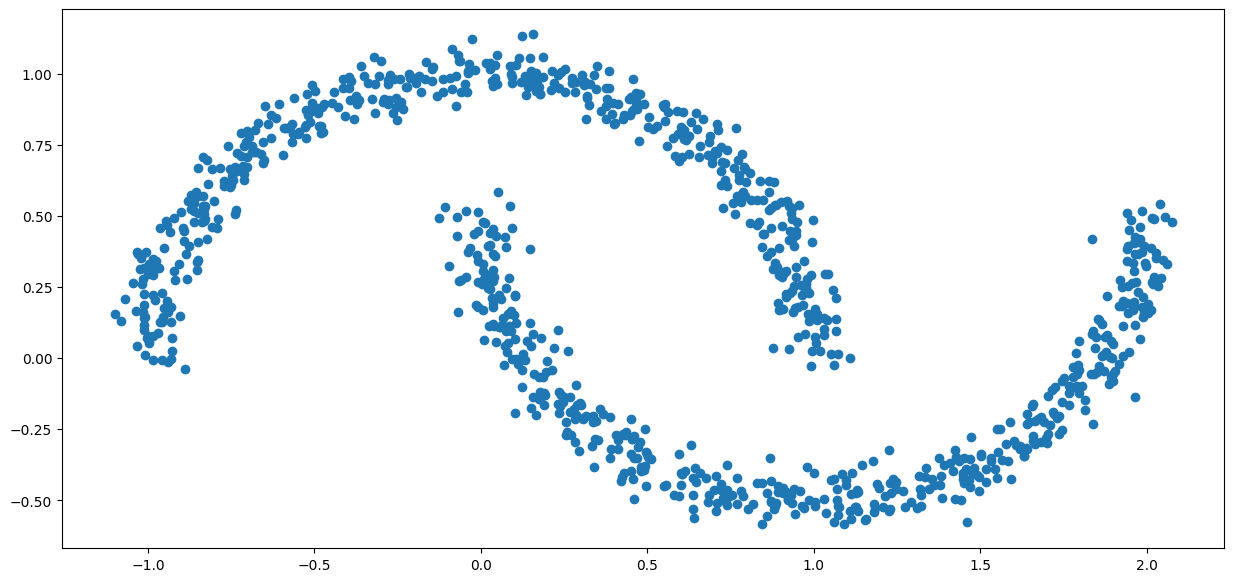

In [ ]:
moons, y = datasets.make_moons(n_samples=1000, noise=0.05, random_state=50)
plt.figure(figsize = (15,7))
plt.scatter(moons[:,0], moons[:,1])

In [ ]:
sets = [lines, circles, donut, moons]

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

In [ ]:
#Kmeans

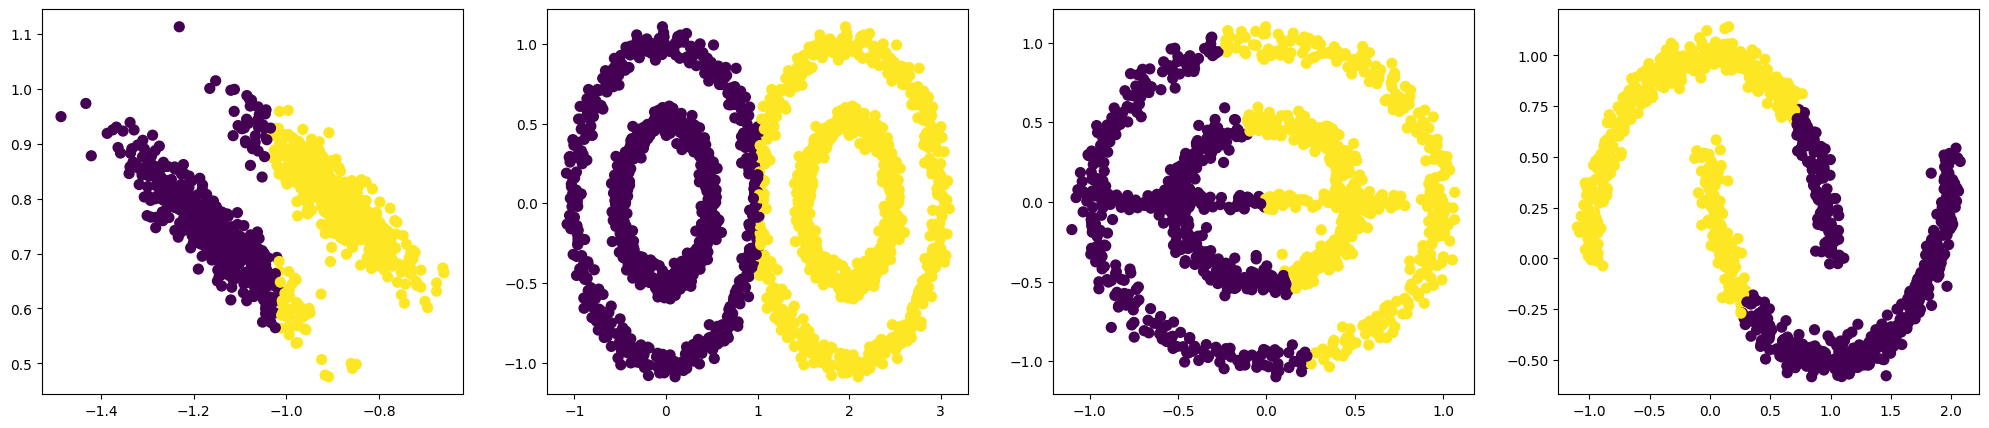

In [ ]:
clust = KMeans(n_clusters=2, n_init="auto")
fig, axes = plt.subplots(1, 4, figsize=(25, 5))
for i, X in enumerate(sets):
   clust.fit(X)
   y_pred = clust.predict(X)
   axes[i].scatter(x=X[:, 0], y=X[:, 1], c=y_pred, s=50);

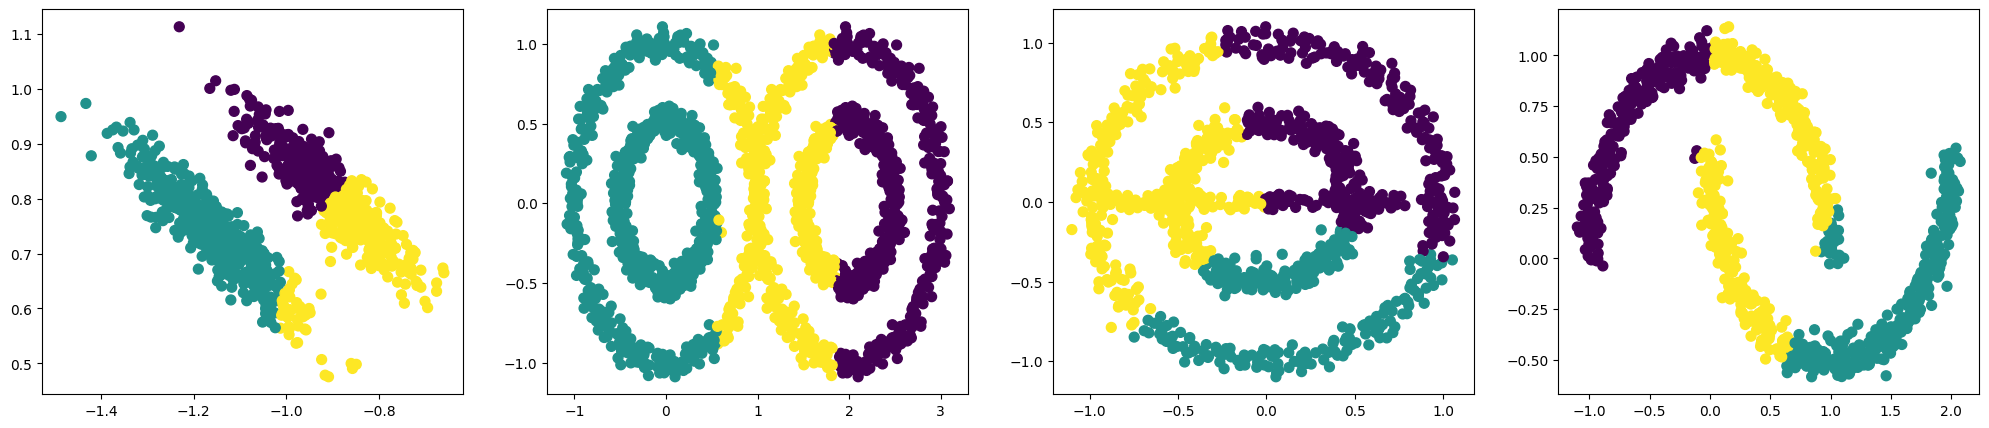

In [ ]:
clust = KMeans(n_clusters=3, n_init="auto")
fig, axes = plt.subplots(1, 4, figsize=(25, 5))
for i, X in enumerate(sets):
   clust.fit(X)
   y_pred = clust.predict(X)
   axes[i].scatter(x=X[:, 0], y=X[:, 1], c=y_pred, s=50);

In [ ]:
#DBSCAN

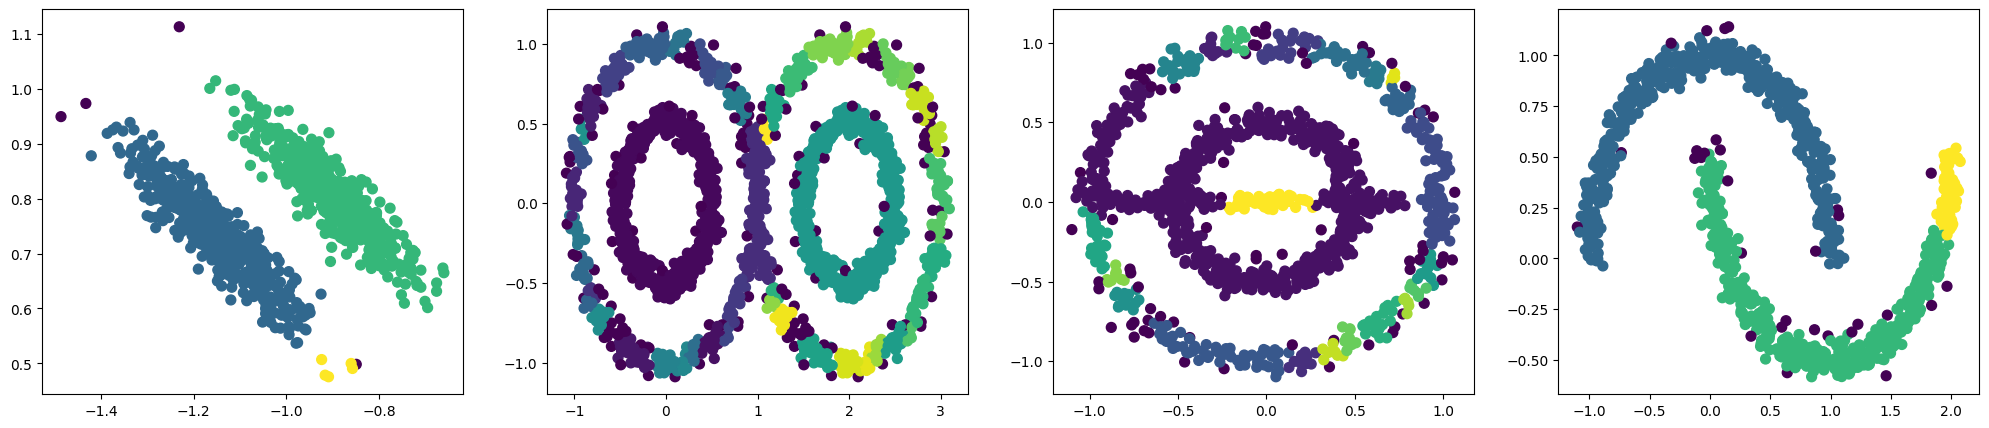

In [ ]:
clust = DBSCAN(eps=0.06)
fig, axes = plt.subplots(1, 4, figsize=(25, 5))
for i, X in enumerate(sets):
   y_pred = clust.fit_predict(X)
   axes[i].scatter(x=X[:, 0], y=X[:, 1], c=y_pred, s=50);

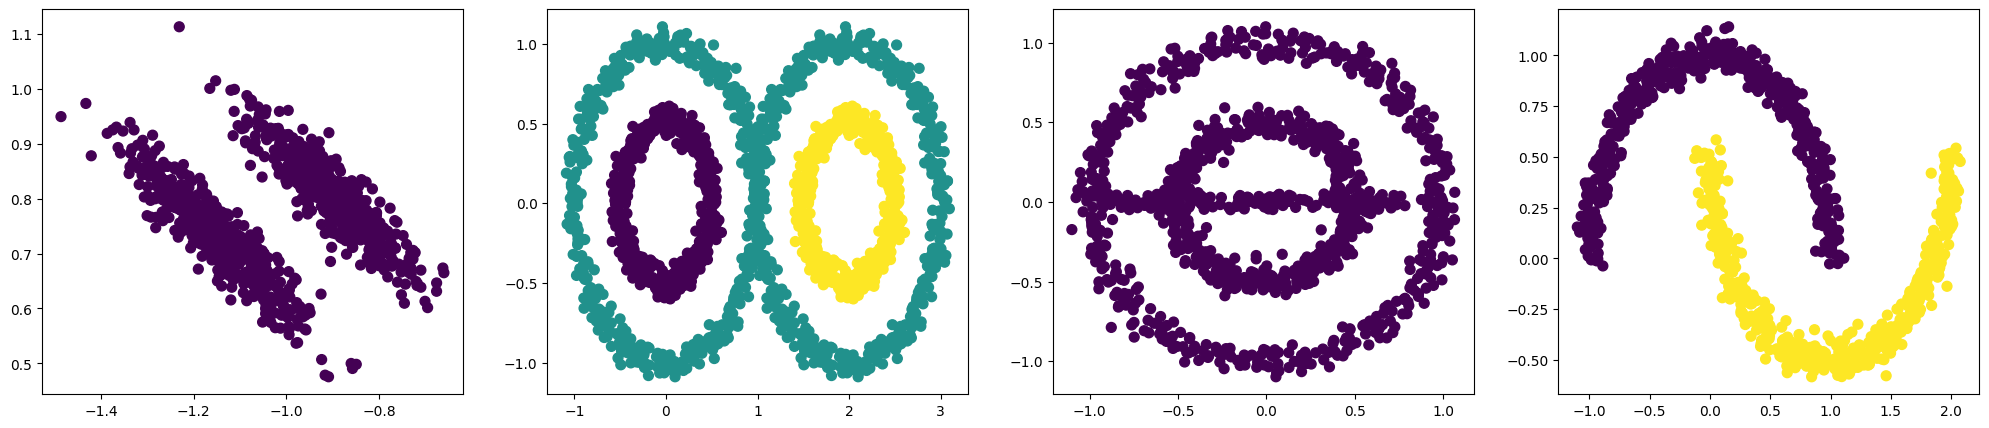

In [ ]:
clust = DBSCAN(eps=0.2)
fig, axes = plt.subplots(1, 4, figsize=(25, 5))
for i, X in enumerate(sets):
   y_pred = clust.fit_predict(X)
   axes[i].scatter(x=X[:, 0], y=X[:, 1], c=y_pred, s=50);

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
#Aglomirate

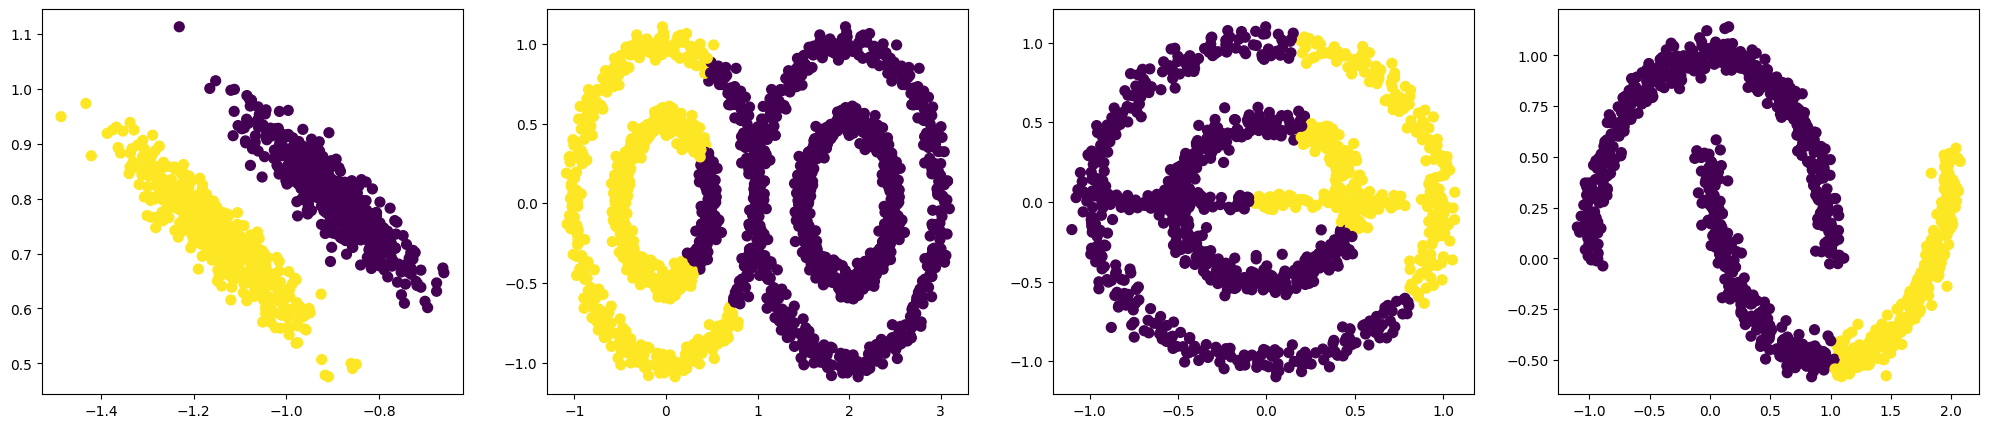

In [ ]:
clust = AgglomerativeClustering(n_clusters = 2)
fig, axes = plt.subplots(1, 4, figsize=(25, 5))
for i, X in enumerate(sets):
   y_pred = clust.fit_predict(X)
   axes[i].scatter(x=X[:, 0], y=X[:, 1], c=y_pred, s=50);

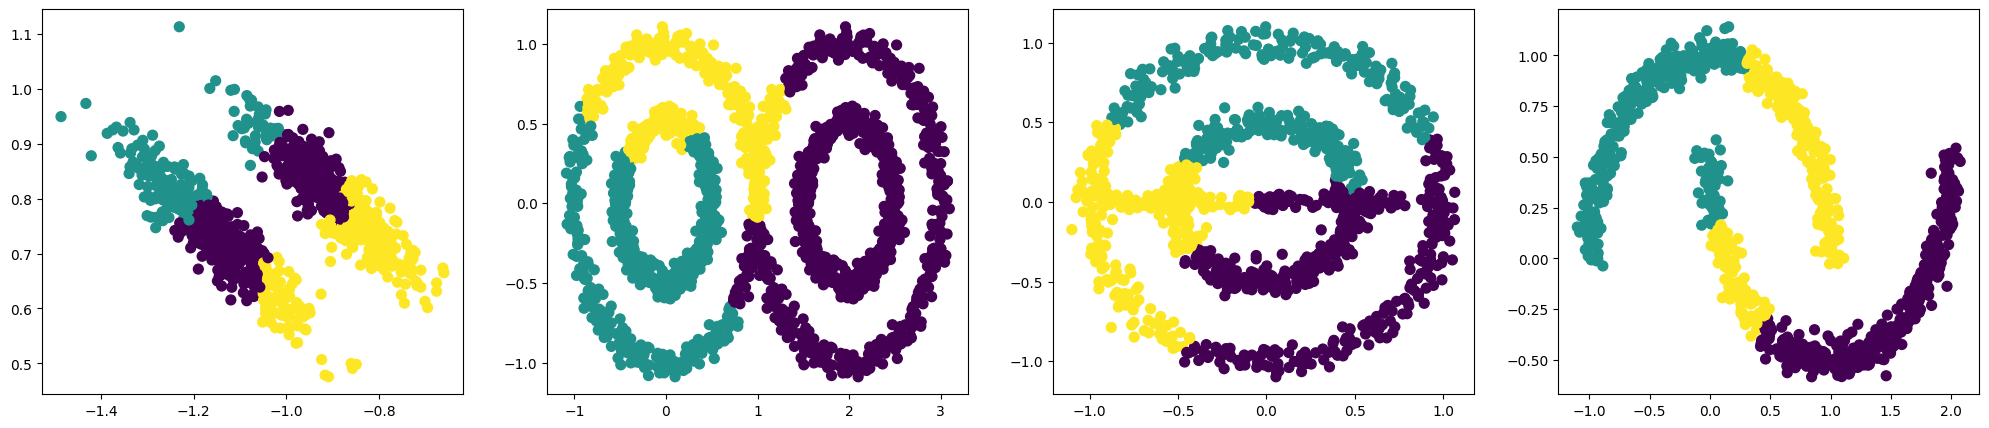

In [ ]:
clust = AgglomerativeClustering(n_clusters = 3, metric = "manhattan", linkage="complete")
fig, axes = plt.subplots(1, 4, figsize=(25, 5))
for i, X in enumerate(sets):
   y_pred = clust.fit_predict(X)
   axes[i].scatter(x=X[:, 0], y=X[:, 1], c=y_pred, s=50);